# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

C:\Users\vishw\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100

38/38 [==============================] - 11s 78ms/step - loss: 0.0470
Epoch 2/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0069
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0042
Epoch 13/100
38/38 [==

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

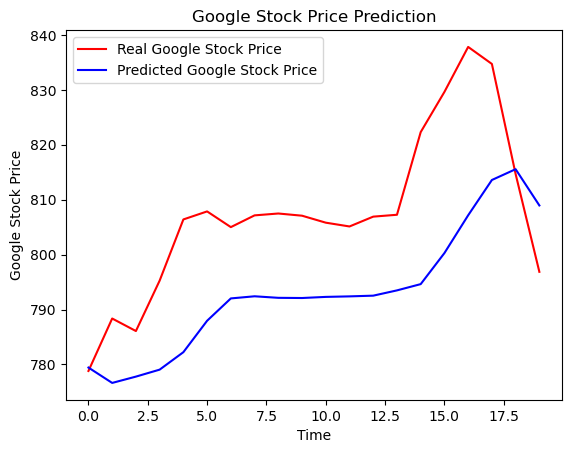

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
# Assuming `real_stock_price` and `predicted_stock_price` are already defined as per your code

mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 309.8513178435356
Mean Absolute Error: 15.757932250976562
R^2 Score: -0.42565478568184223


In [22]:
regressor.save('google_stock_price_model.h5')  # Saves the model

C:\Users\vishw\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from keras.models import load_model

In [24]:
# Load the model
model = load_model('google_stock_price_model.h5')

# Assuming `X_test` is already defined and preprocessed as per your code
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Continue with visualizing results or evaluating metrics as needed

1/1 [==============================] - 3s 3s/step


In [25]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.2, verbose=1)

Epoch 1/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0010 - val_loss: 8.5573e-04
Epoch 2/100
30/30 [==============================] - 2s 72ms/step - loss: 0.0011 - val_loss: 5.4243e-04
Epoch 3/100
30/30 [==============================] - 2s 78ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/100
30/30 [==============================] - 3s 86ms/step - loss: 9.5421e-04 - val_loss: 0.0011
Epoch 5/100
30/30 [==============================] - 2s 77ms/step - loss: 0.0010 - val_loss: 4.8512e-04
Epoch 6/100
30/30 [==============================] - 2s 81ms/step - loss: 9.4876e-04 - val_loss: 5.0454e-04
Epoch 7/100
30/30 [==============================] - 3s 85ms/step - loss: 9.1111e-04 - val_loss: 6.4300e-04
Epoch 8/100
30/30 [==============================] - 2s 79ms/step - loss: 0.0011 - val_loss: 4.8651e-04
Epoch 9/100
30/30 [==============================] - 2s 72ms/step - loss: 0.0011 - val_loss: 4.9802e-04
Epoch 10/100
30/30 [==============================] - 2s 71

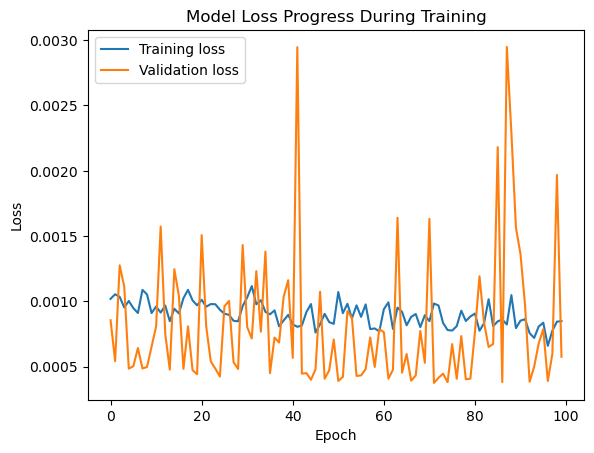

In [26]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

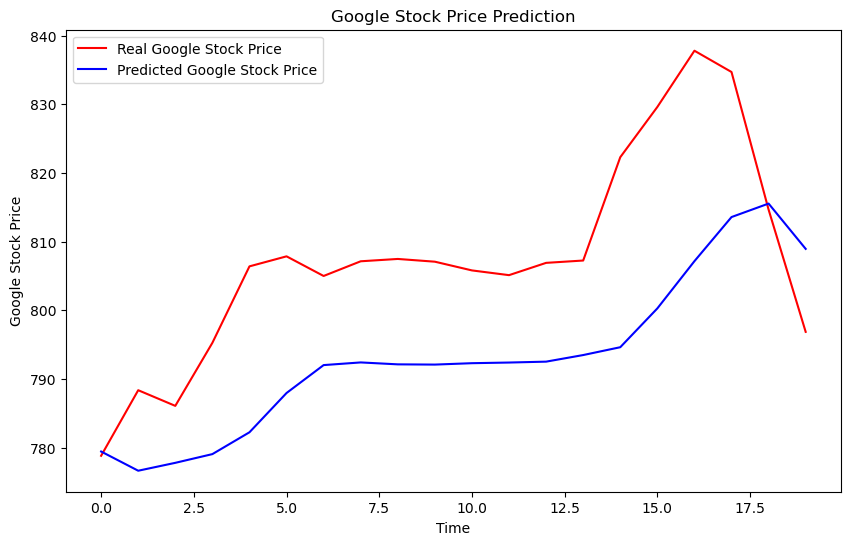

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

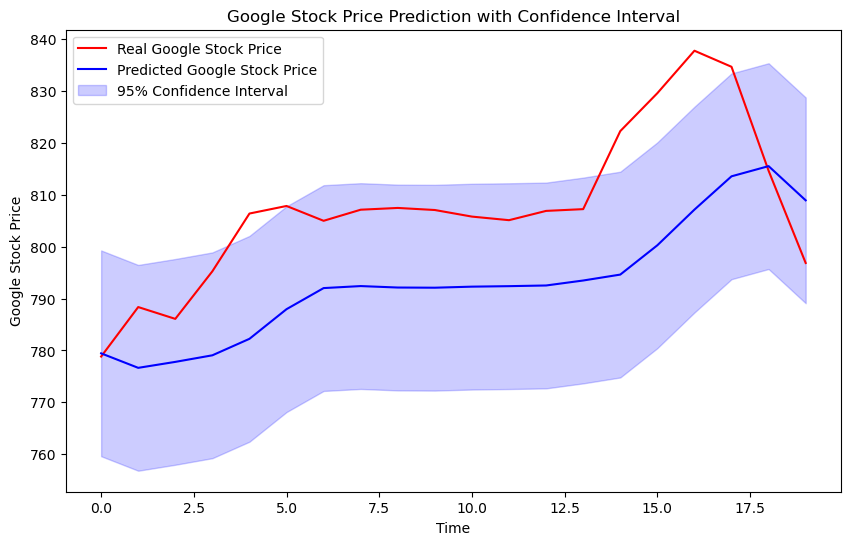

In [30]:
# Calculate prediction errors
errors = real_stock_price.flatten() - predicted_stock_price.flatten()
confidence_interval = 1.96 * np.std(errors)

plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.fill_between(range(len(real_stock_price)), 
                 (predicted_stock_price.flatten() - confidence_interval), 
                 (predicted_stock_price.flatten() + confidence_interval), 
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('Google Stock Price Prediction with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

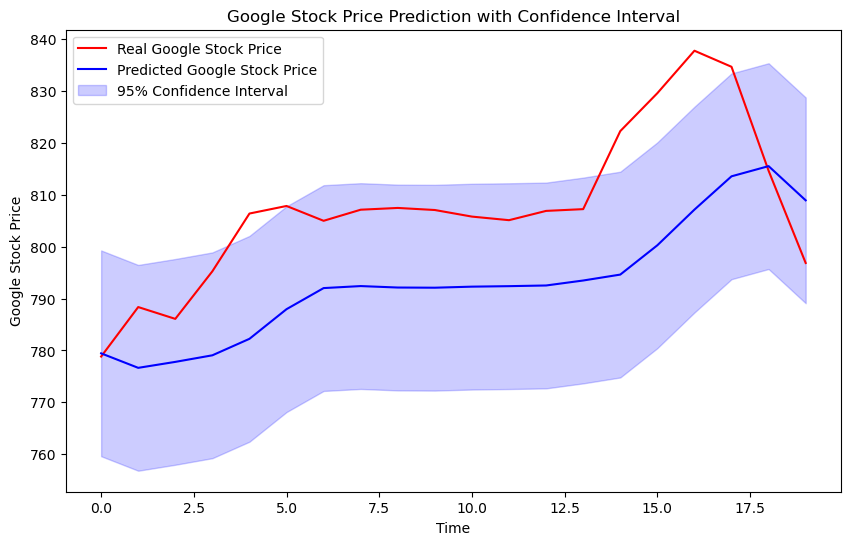

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming real_stock_price and predicted_stock_price are already defined

# Calculate prediction errors
errors = real_stock_price.flatten() - predicted_stock_price.flatten()

# Calculate the confidence interval
confidence_interval = 1.96 * np.std(errors)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.fill_between(range(len(real_stock_price)), 
                 (predicted_stock_price.flatten() - confidence_interval), 
                 (predicted_stock_price.flatten() + confidence_interval), 
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('Google Stock Price Prediction with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()